
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# Preferencias de los pasajeros y el impacto de los factores externos en los viajes de taxi

## Introducción

### Objetivo

Encontrar patrones en la información disponible. Con la finalidad de comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Se analizará los datos de los competidores y se probará una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

### Datos

"/datasets/project_sql_result_01.csv": contiene los siguientes datos:

* company_name: nombre de la empresa de taxis

* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

"/datasets/project_sql_result_04.csv.": contiene los siguientes datos:

* dropoff_location_name: barrios de Chicago donde finalizaron los viajes

* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

"/datasets/project_sql_result_07.csv": contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Estos son los valores de campo de la tabla:

* start_ts: fecha y hora de la recogida
* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
* duration_seconds: duración del viaje en segundos

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Ariel, excelente trabajo agregando una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

## Tratamiento inicial de los datos

### Importación de librerías

In [1]:
import pandas as pd 
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

#### Datos viajes de taxis por compañia

In [2]:
df_company_taxi_trips = pd.read_csv('/datasets/project_sql_result_01.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
# Impresión de una muestra de los datos para los datos de viajes de taxis por compañia
print(df_company_taxi_trips.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [4]:
# Imprime la información general/resumida sobre el DataFrame
df_company_taxi_trips.info()

duplicates = df_company_taxi_trips.duplicated().sum()
print("En la tabla ""df_company_taxi"" exiten: ", duplicates , "valores duplicados")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
En la tabla df_company_taxi exiten:  0 valores duplicados


#### Datos de barrios donde termino cada viaje de taxi

In [5]:
df_neighborhood_taxi_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

In [6]:
# Impresión de una muestra de los datos para los datos de barrios en donde termino cada viaje
print(df_neighborhood_taxi_trips.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [7]:
# Imprime la información general/resumida sobre el DataFrame
df_neighborhood_taxi_trips.info()

duplicates = df_neighborhood_taxi_trips.duplicated().sum()
print("En la tabla ""df_neighborhood_taxi_trips"" exiten: ", duplicates , "valores duplicados")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
En la tabla df_neighborhood_taxi_trips exiten:  0 valores duplicados


#### Datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare

In [8]:
df_hipotesis_test = pd.read_csv('/datasets/project_sql_result_07.csv')

In [9]:
# Impresión de una muestra de los datos para los datos de barrios en donde termino cada viaje
print(df_hipotesis_test.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [10]:
# Imprime la información general/resumida sobre el DataFrame
df_hipotesis_test.info()

duplicates = df_hipotesis_test.duplicated().sum()
print("En la tabla ""df_hipotesis_test"" exiten: ", duplicates , "valores duplicados")

# Eliminar filas duplicadas
df_hipotesis_test = df_hipotesis_test.drop_duplicates()

duplicates = df_hipotesis_test.duplicated().sum()
print("En la tabla ""df_hipotesis_test"" exiten: ", duplicates , "valores duplicados luego de eliminar los duplicados")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
En la tabla df_hipotesis_test exiten:  197 valores duplicados
En la tabla df_hipotesis_test exiten:  0 valores duplicados luego de eliminar los duplicados


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar si contamos con registros duplicados</div>



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

### Preparamiento de los datos

#### Corrección de datos / Dataframe "df_company_taxi_trips"

<font color='#613EF0'>Luego de realizar las correcciones del dataframe se concluyó lo siguiente:</font>

- <font color='#613EF0'>No existe datos ausentes ni duplicados en las dos columnas del dataframe.</font>
- <font color='#613EF0'>Los tipos de datos son correctos y adecuados para empezar a realizar un análisis.</font>

In [11]:
print("----------------------COLUMNA COMPANY NAME------------------------")

# Convertir todos los nombres en la columna 'Name' a minúsculas
df_company_taxi_trips['company_name'] = df_company_taxi_trips['company_name'].str.lower()

#Verificar si existen valores ausentes en esta columna
absents_names = df_company_taxi_trips['company_name'].isna().sum()
print("Existen: ", absents_names, "valores ausentes en la columna ""company_name")

print("---------------------------------------------------------------")

unique_companies = df_company_taxi_trips['company_name'].unique()
print("Companias existentes en el dataset:")
print(unique_companies)

print("---------------------------------------------------------------")

print("----------------------COLUMNA Trips_Amount------------------------")

#Verificar si existen valores ausentes en esta columna
absents_trips_amount = df_company_taxi_trips['trips_amount'].isna().sum()
print("Existen: ", absents_trips_amount, "valores ausentes en la columna ""trips_amount")

# Obtener el valor máximo y mínimo de la columna 'Year_of_Release'
max_trips_amount = df_company_taxi_trips['trips_amount'].max()
min_trips_amount = df_company_taxi_trips['trips_amount'].min()

print("Valor máximo en 'trips_amount':", max_trips_amount)
print("Valor mínimo en 'trips_amount':", min_trips_amount)

----------------------COLUMNA COMPANY NAME------------------------
Existen:  0 valores ausentes en la columna company_name
---------------------------------------------------------------
Companias existentes en el dataset:
['flash cab' 'taxi affiliation services' 'medallion leasing' 'yellow cab'
 'taxi affiliation service yellow' 'chicago carriage cab corp'
 'city service' 'sun taxi' 'star north management llc'
 'blue ribbon taxi association inc.' 'choice taxi association'
 'globe taxi' 'dispatch taxi affiliation' 'nova taxi affiliation llc'
 'patriot taxi dba peace taxi association' 'checker taxi affiliation'
 'blue diamond' 'chicago medallion management' '24 seven taxi'
 'chicago medallion leasing inc' 'checker taxi' 'american united'
 'chicago independents' 'koam taxi association' 'chicago taxicab'
 'top cab affiliation' 'gold coast taxi' 'service taxi association'
 '5 star taxi' '303 taxi' 'setare inc' 'american united taxi affiliation'
 'leonard cab co' 'metro jet taxi a' 'norshor

#### Corrección de datos / Dataframe "df_neighborhood_taxi_trips"

<font color='#613EF0'>Luego de realizar las correcciones del dataframe se concluyó lo siguiente:</font>

- <font color='#613EF0'>No existe datos ausentes ni duplicados en las dos columnas del dataframe.</font>
- <font color='#613EF0'>Los tipos de datos son correctos y adecuados para empezar a realizar un análisis.</font>

In [12]:
print("----------------------COLUMNA Dropoff_location_name------------------------")

# Convertir todos los nombres en la columna 'Name' a minúsculas
df_neighborhood_taxi_trips['dropoff_location_name'] = df_neighborhood_taxi_trips['dropoff_location_name'].str.lower()

#Verificar si existen valores ausentes en esta columna
absents_location_name = df_neighborhood_taxi_trips['dropoff_location_name'].isna().sum()
print("Existen: ", absents_location_name, "valores ausentes en la columna ""dropoff_location_name")

# Reemplazar valores ausentes en la columna 'Name' con "unknown"
df_neighborhood_taxi_trips['dropoff_location_name'] = df_neighborhood_taxi_trips['dropoff_location_name'].fillna('unknown')

unique_dropoff_location_name = df_neighborhood_taxi_trips['dropoff_location_name'].unique()
print("Nombres de localizaciones de llegada existentes en el dataset:")
print(unique_dropoff_location_name)

print("----------------------COLUMNA Average_trips------------------------")

#Verificar si existen valores ausentes en esta columna
absents_average_trips = df_neighborhood_taxi_trips['average_trips'].isna().sum()
print("Existen: ", absents_average_trips, "valores ausentes en la columna ""absents_average_trips")

# Obtener el valor máximo y mínimo de la columna 'average_trips'
max_average_trips = df_neighborhood_taxi_trips['average_trips'].max()
min_average_trips = df_neighborhood_taxi_trips['average_trips'].min()

print("Valor máximo en 'average_trips':", max_average_trips)
print("Valor mínimo en 'average_trips':", min_average_trips)

----------------------COLUMNA Dropoff_location_name------------------------
Existen:  0 valores ausentes en la columna dropoff_location_name
Nombres de localizaciones de llegada existentes en el dataset:
['loop' 'river north' 'streeterville' 'west loop' "o'hare" 'lake view'
 'grant park' 'museum campus' 'gold coast' 'sheffield & depaul'
 'lincoln park' 'east village' 'little italy, uic' 'uptown'
 'near south side' 'garfield ridge' 'logan square' 'edgewater' 'west town'
 'old town' 'rush & division' 'north center' 'lincoln square'
 'rogers park' 'west ridge' 'irving park' 'hyde park' 'avondale'
 'wicker park' 'albany park' 'united center' 'lower west side' 'douglas'
 'portage park' 'humboldt park' 'norwood park' 'kenwood' 'bridgeport'
 'armour square' 'jefferson park' 'bucktown' 'north park' 'garfield park'
 'mckinley park' 'belmont cragin' 'boystown' 'chinatown' 'grand boulevard'
 'austin' 'sauganash,forest glen' 'south shore' 'woodlawn'
 'little village' 'jackson park' 'north lawndale

#### Corrección de datos / Dataframe "df_hipotesis_test"

<font color='#613EF0'>Luego de realizar las correcciones del dataframe se concluyó lo siguiente:</font>

- <font color='#613EF0'>No existe datos ausentes ni duplicados en las tres columnas del dataframe.</font>
- <font color='#613EF0'>Excluyendo la columna "start_ts", los tipos de datos son correctos y adecuados para empezar a realizar un análisis.</font> 

In [13]:
print("----------------------COLUMNA start_ts------------------------")

#Verificar si existen valores ausentes en esta columna
absents_start_ts = df_hipotesis_test['start_ts'].isna().sum()
print("Existen: ", absents_start_ts, "valores ausentes en la columna" " start_ts")

# Transformar los datos de 'start_ts' en tipo datetime
df_hipotesis_test['start_ts'] = pd.to_datetime(df_hipotesis_test['start_ts'])

# Verificar el tipo de datos después de la transformación
print(df_hipotesis_test['start_ts'].dtype)

print("-------------------Columna weather_conditions --------------------------")

# Convertir todos los nombres en la columna 'Name' a minúsculas
df_hipotesis_test['weather_conditions'] = df_hipotesis_test['weather_conditions'].str.lower()

#Verificar si existen valores ausentes en esta columna
absents_weather_conditions = df_hipotesis_test['weather_conditions'].isna().sum()
print("Existen: ", absents_weather_conditions, "valores ausentes en la columna" " weather_conditions")

unique_dropoff_weather_conditions = df_hipotesis_test['weather_conditions'].unique()
print("Condiciones de clima existentes en el dataset:")
print(unique_dropoff_weather_conditions)
 
print("----------------------COLUMNA Duration_seconds------------------------")

#Verificar si existen valores ausentes en esta columna
absents_duration_seconds = df_hipotesis_test['duration_seconds'].isna().sum()
print("Existen: ", absents_duration_seconds, "valores ausentes en la columna ""duration_seconds")

# Obtener el valor máximo y mínimo de la columna 'Year_of_Release'
max_duration_seconds = df_hipotesis_test['duration_seconds'].max()
min_duration_seconds = df_hipotesis_test['duration_seconds'].min()

print("Valor máximo en 'duration_seconds':", max_duration_seconds)
print("Valor mínimo en 'duration_seconds':", min_duration_seconds)

----------------------COLUMNA start_ts------------------------
Existen:  0 valores ausentes en la columna start_ts
datetime64[ns]
-------------------Columna weather_conditions --------------------------
Existen:  0 valores ausentes en la columna weather_conditions
Condiciones de clima existentes en el dataset:
['good' 'bad']
----------------------COLUMNA Duration_seconds------------------------
Existen:  0 valores ausentes en la columna duration_seconds
Valor máximo en 'duration_seconds': 7440.0
Valor mínimo en 'duration_seconds': 0.0


## Analisis de los datos

### Identificar los 10 principales barrios en términos de finalización del recorrido

<font color='#613EF0'>Se puede observar que la gran mayoría de los viajes finalizan en el barrio Loop. Quiza esto se deba a que es algun tipo de zona comercial o un vecindario muy popular con gente que tiene accesibilidad a pagar taxis para el regreso a su casa.</font>

In [14]:
# Ordenar los datos por 'average_trips' en orden descendente
df_boroughs_sorted = df_neighborhood_taxi_trips.sort_values(by='average_trips', ascending=False)

# Seleccionar los 10 principales barrios
top_10_boroughs = df_boroughs_sorted.head(10)

# Mostrar los resultados
print(top_10_boroughs)

  dropoff_location_name  average_trips
0                  loop   10727.466667
1           river north    9523.666667
2         streeterville    6664.666667
3             west loop    5163.666667
4                o'hare    2546.900000
5             lake view    2420.966667
6            grant park    2068.533333
7         museum campus    1510.000000
8            gold coast    1364.233333
9    sheffield & depaul    1259.766667


### Gráficos

<font color='#613EF0'>Se puede observar que la gran mayoría de los viajes finalizan en el barrio Loop. Quiza esto se deba a que es algun tipo de zona comercial o un vecindario muy popular con gente que tiene accesibilidad a pagar taxis para el regreso a su casa.</font>

CONCLUSIONES

- <font color='#613EF0'>Cuando existen muchas categorías como en el caso de todas las compañias de taxis existentes, es complicado representar todos los datos de este problema. Ahora, con lo visto en el gráfico se observa que la compañia "Flash Cab" tiene el monopolio de las compañias de taxis, pues sobrepasa en gran medida en número de viajes con otras compañias. Tal vez exista un error en los datos, pero sin este análisis de errores, no se puede contradecir el hecho de que Flash Cab es la líder en viajes de taxi.</font>

- <font color='#613EF0'>Los barrios Loop y River North son los destinos mas pedidos en los viajes de taxis. Quiza se deba a que son zonas comerciales o vecindarios con gente que tiene acceso a gran cantidad de viajes en taxi.</font>

#### Empresas de taxis y número de viajes

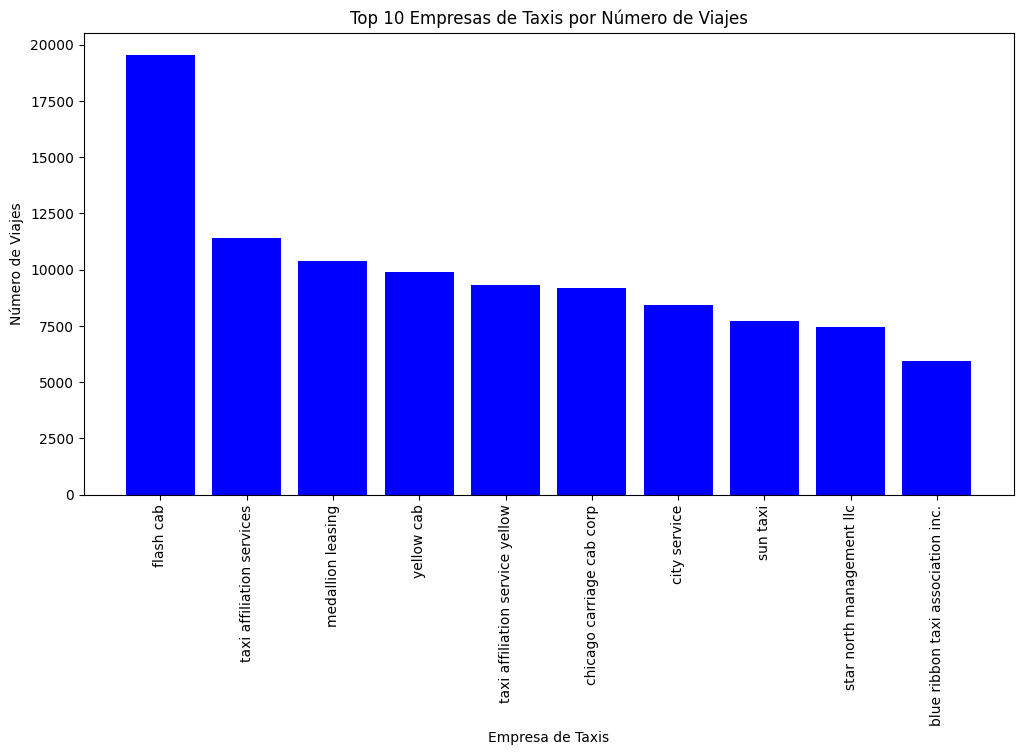

In [18]:
# Ordenar el DataFrame por trips_amount en orden descendente y seleccionar el top 10
df_top_10 = df_company_taxi_trips.sort_values(by='trips_amount', ascending=False).head(10)

# Crear el gráfico de las 10 principales empresas de taxis y número de viajes
plt.figure(figsize=(12, 6))
plt.bar(df_top_10['company_name'], df_top_10['trips_amount'], color='blue')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Top 10 Empresas de Taxis por Número de Viajes')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

####  Los 10 barrios principales por número de finalizaciones

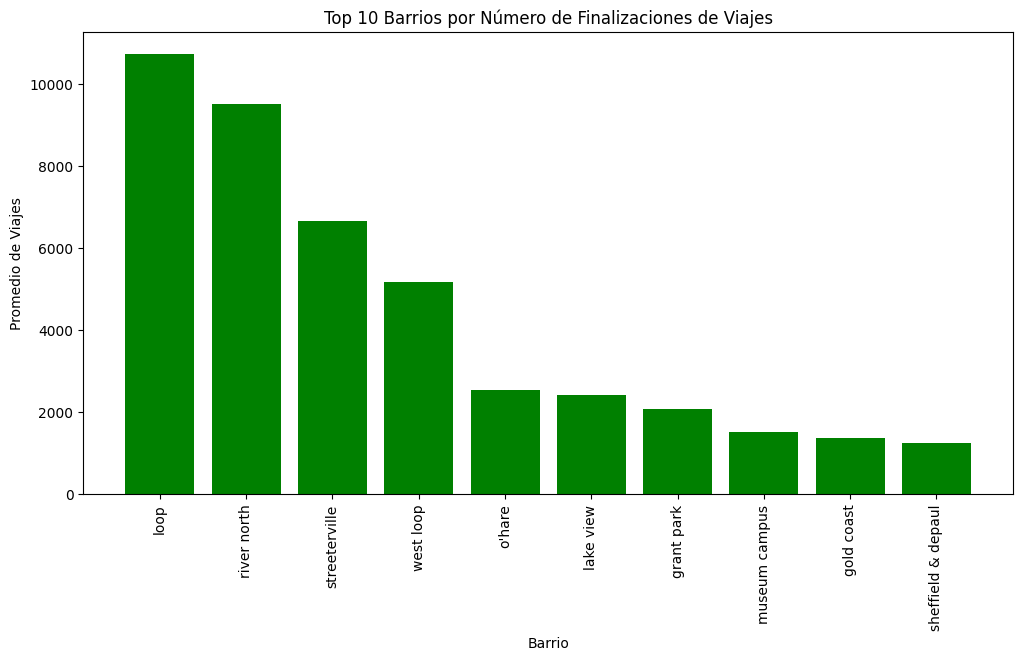

In [16]:
# Crear el gráfico de los 10 principales barrios por número de finalizaciones de viajes
plt.figure(figsize=(12, 6))
plt.bar(top_10_boroughs['dropoff_location_name'], top_10_boroughs['average_trips'], color='green')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.title('Top 10 Barrios por Número de Finalizaciones de Viajes')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

## Pruebas de Hipótesis

### ¿La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos?.

#### Procedimiento

1.- Planteamiento de las hipótesis:

Hipótesis nula (H0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.
Hipótesis alternativa (H1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

2.- Criterio para probar las hipótesis:
Se utilizará un prueba t de dos muestras (t-test) para comparar las duraciones promedio de los viajes en sábados lluviosos contra los sábados no lluviosos. Esta prueba es adecuada para comparar las medias de dos grupos independientes.

3.- Nivel de significación (α):
Se utilizará un nivel de significación de 0.04.

In [19]:
# Filtrar los datos para seleccionar solo los sábados
df_hipotesis_test['day_of_week'] = df_hipotesis_test['start_ts'].dt.dayofweek
df_saturdays = df_hipotesis_test[df_hipotesis_test['day_of_week'] == 5]

# Filtrar los viajes de sábados lluviosos y no lluviosos
rainy_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'bad']['duration_seconds']
non_rainy_saturdays = df_saturdays[df_saturdays['weather_conditions'] == 'good']['duration_seconds']

# Realizar la prueba de Levene para verificar si las varianzas son iguales
levene_stat, levene_p = stats.levene(rainy_saturdays, non_rainy_saturdays)

# Imprimir los resultados de la prueba de Levene
print(f'Estadístico de Levene: {levene_stat}')
print(f'Valor p de Levene: {levene_p}')

# Determinar si las varianzas son iguales o no
equal_var = levene_p > 0.05

# Realizar la prueba t de dos muestras considerando el resultado de Levene
t_stat, p_value = stats.ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=equal_var)

# Imprimir los resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

# Decidir sobre la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula. La duración promedio de los viajes no cambia los sábados lluviosos.")

Estadístico de Levene: 0.000586951625283602
Valor p de Levene: 0.9806770360671218
Estadístico t: 5.427957689754561
Valor p: 7.397770692813658e-08
Rechazamos la hipótesis nula. La duración promedio de los viajes cambia los sábados lluviosos.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(rainy_saturday_trips['duration_seconds'], non_rainy_saturday_trips ['duration_seconds'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<font color='#613EF0'>Debido a un valor p aproximado de 7.397770692813658e-08 se puede rechazar la hipótesis nula, lo que sugiere que la duración promedio de los viajes cambia los sábados lluviosos.</font>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

## Conclusiones generales

- <font color='#613EF0'>Antes de realizar un análisis sobre un conjunto de datos, es sumamente importante la limpieza de los mismos, pues, los resultados pueden verse comprometidos, no ser efectivos o inclusive mostar un resultado diferente si esta etapa del análisis no es aplicada correctamente.</font>

- <font color='#613EF0'> Cuando existen muchas categorías como en el caso de todas las compañias de taxis existentes, es complicado representar todos los datos de este problema. Ahora, con lo visto en el gráfico se observa que la compañia "Flash Cab" tiene el monopolio de las compañias de taxis, pues sobrepasa en gran medida en número de viajes con otras compañias. Tal vez exista un error en los datos, pero sin este análisis de errores, no se puede contradecir el hecho de que Flash Cab es la líder en viajes de taxi.</font>

- <font color='#613EF0'>Los barrios Loop y River North son los destinos mas pedidos en los viajes de taxis. Quiza se deba a que son zonas comerciales o vecindarios con gente que tiene acceso a gran cantidad de viajes en taxi.</font>

- <font color='#613EF0'>Es totalmente normal que la duración promedio de los viajes cambien los día lluviosos, ya que, existe un aumento del tráfico debido a las condiciones de la calle. Quiza en otros días, no cambie la duración promedio de los viajes, pero ese es otro análisis que se debe realizar.</font>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)

    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>